In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# @title Default title text
path = "/content/drive/MyDrive/praktikum_ml/praktikum03"

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
df = pd.read_csv(path + '/data/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#menentukan variabel dependen dan independen
X = df[['temp', 'atemp', 'hum', 'windspeed', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]
y = df['cnt']

In [6]:
#menambahkan konstanta untuk model regresi
X = sm.add_constant(X)

In [12]:
#model regresi
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     261.9
Date:                Sun, 12 Oct 2025   Prob (F-statistic):          7.80e-243
Time:                        15:00:40   Log-Likelihood:                -5981.0
No. Observations:                 731   AIC:                         1.199e+04
Df Residuals:                     719   BIC:                         1.204e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1469.0031    240.218      6.115      0.0

In [8]:
#cek akurasi sederhana
y_pred = model.predict(X)
hasil = pd.DataFrame({'Aktual': y, 'Prediksi': y_pred})
hasil.head()

,Aktual,Prediksi
0,985,1898.431797
1,801,1374.425553
2,1349,1512.844903
3,1562,1739.506787
4,1600,2012.868269


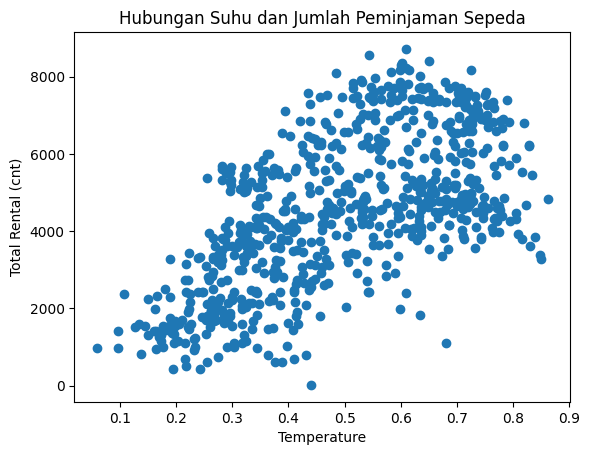

In [9]:
#grafik hubungan antara variabel dengan cnt
import matplotlib.pyplot as plt

plt.scatter(df['temp'], df['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Total Rental (cnt)')
plt.title('Hubungan Suhu dan Jumlah Peminjaman Sepeda')
plt.show()

In [13]:
hasil.to_csv('hasil_prediksi_cnt', index=False)